In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_excel("D:/projects/data.xlsx")
df.head()
df.tail()


,name,online_order,book_table,Rating,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
41185,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","north indian, continental",800,Pubs and bars,Whitefield
41186,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","andhra, south indian, chinese, north indian",800,Pubs and bars,Whitefield
41187,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,continental,1500,Pubs and bars,Whitefield
41188,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,finger food,2500,Pubs and bars,Whitefield
41189,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield","Bar, Casual Dining","finger food, north indian, continental",1500,Pubs and bars,Whitefield


In [3]:
print("Shape:", df.shape) 
print("Columns:\n", df.columns)
print("Info:\n")
df.info()
print("Describe:\n")
print(df.describe(include='all'))

Shape: (41190, 11)
Columns:
 Index(['name', 'online_order', 'book_table', 'Rating', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41190 entries, 0 to 41189
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         41190 non-null  object 
 1   online_order                 41190 non-null  object 
 2   book_table                   41190 non-null  object 
 3   Rating                       41190 non-null  float64
 4   votes                        41190 non-null  int64  
 5   location                     41190 non-null  object 
 6   rest_type                    41190 non-null  object 
 7   cuisines                     41190 non-null  object 
 8   approx_cost(for two people)  41190 non-null  int64  
 9   liste

In [4]:
print("Missing values:\n")
print(df.isnull().sum())


Missing values:

name                           0
online_order                   0
book_table                     0
Rating                         0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64


In [5]:
print("Duplicates:", df.duplicated().sum())

df = df.drop_duplicates().reset_index(drop=True)
df.reset_index(drop=True, inplace=True)
df.head()

Duplicates: 0


,name,online_order,book_table,Rating,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"north indian, mughlai, chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"chinese, north indian, thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","cafe, mexican, italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"south indian, north indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"north indian, rajasthani",600,Buffet,Banashankari


In [6]:
df['cuisines'] = df['cuisines'].str.lower().str.replace(r'\s+', ' ', regex=True)


In [7]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

df.loc[(df['Rating'] > 5) | (df['Rating'] < 0), 'Rating'] = pd.NA

df['Rating'] = df.groupby('location')['Rating'].transform(lambda x: x.fillna(x.mean()))
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())  

df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '')
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')


df['approx_cost(for two people)'] = df.groupby('location')['approx_cost(for two people)'].transform(lambda x: x.fillna(x.mean()))
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].mean())  # fallback


In [8]:

df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

# Convert 'rating' to float
df['Rating'] = df['Rating'].astype(float)

# Convert 'votes' to int
df['votes'] = df['votes'].astype(int)
df

,name,online_order,book_table,Rating,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"north indian, mughlai, chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"chinese, north indian, thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","cafe, mexican, italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"south indian, north indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"north indian, rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
41185,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","north indian, continental",800.0,Pubs and bars,Whitefield
41186,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","andhra, south indian, chinese, north indian",800.0,Pubs and bars,Whitefield
41187,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,continental,1500.0,Pubs and bars,Whitefield
41188,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,finger food,2500.0,Pubs and bars,Whitefield


In [10]:
df.to_excel('cleaned.xlsx', index=False)
    

In [9]:

df['cuisines'] = df['cuisines'].str.split(', ')


df_exploded = df.explode('cuisines')


cuisine_stats = df_exploded.groupby('cuisines').agg(
    avg_rating=('Rating', 'mean'),
    avg_votes=('votes', 'mean'),
    avg_cost=('approx_cost(for two people)', 'mean')
).reset_index()


cuisine_stats_sorted = cuisine_stats.sort_values(by='avg_rating', ascending=False)


In [11]:

top_rated_cuisines = cuisine_stats_sorted.head(10)
top_voted_cuisines = cuisine_stats_sorted.sort_values(by='avg_votes', ascending=False).head(10)


In [12]:

best_rated = df[df['Rating'] > 4]


best_rated_cuisines = best_rated.explode('cuisines')[['name','Rating', 'cuisines']]

best_rated_cuisines.head(10)


,name,Rating,cuisines
0,Jalsa,4.1,north indian
0,Jalsa,4.1,mughlai
0,Jalsa,4.1,chinese
1,Spice Elephant,4.1,chinese
1,Spice Elephant,4.1,north indian
1,Spice Elephant,4.1,thai
7,Onesta,4.6,pizza
7,Onesta,4.6,cafe
7,Onesta,4.6,italian
9,Smacznego,4.2,cafe


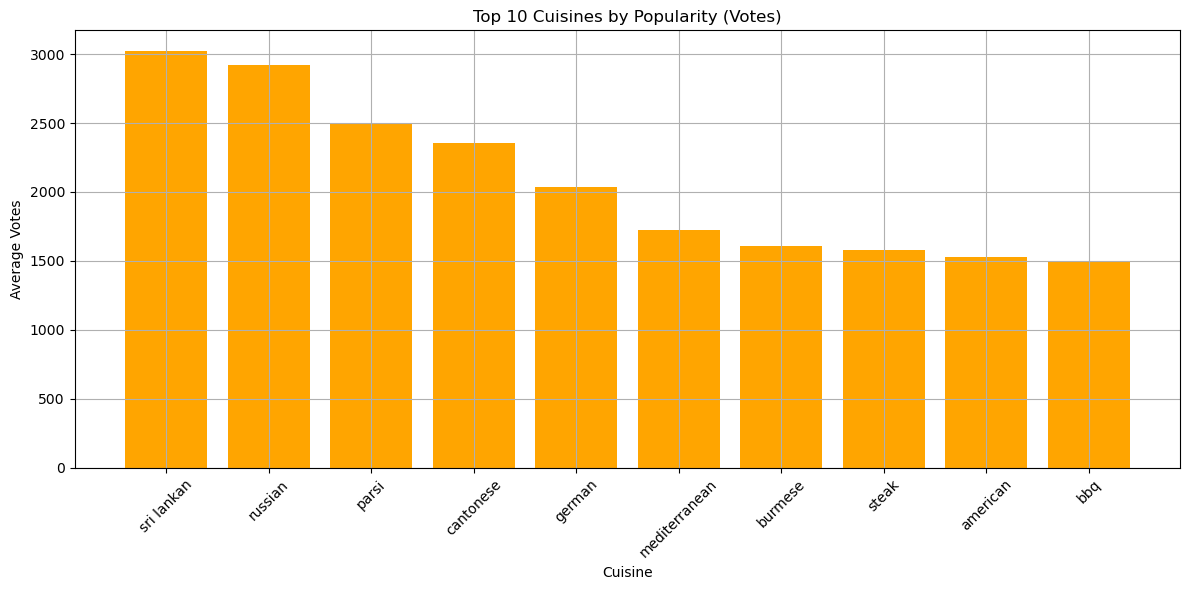

In [16]:
plt.figure(figsize=(12,6))
plt.bar(top_voted_cuisines['cuisines'], top_voted_cuisines['avg_votes'], color='orange')
plt.title('Top 10 Cuisines by Popularity (Votes)')
plt.xlabel('Cuisine')
plt.ylabel('Average Votes')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


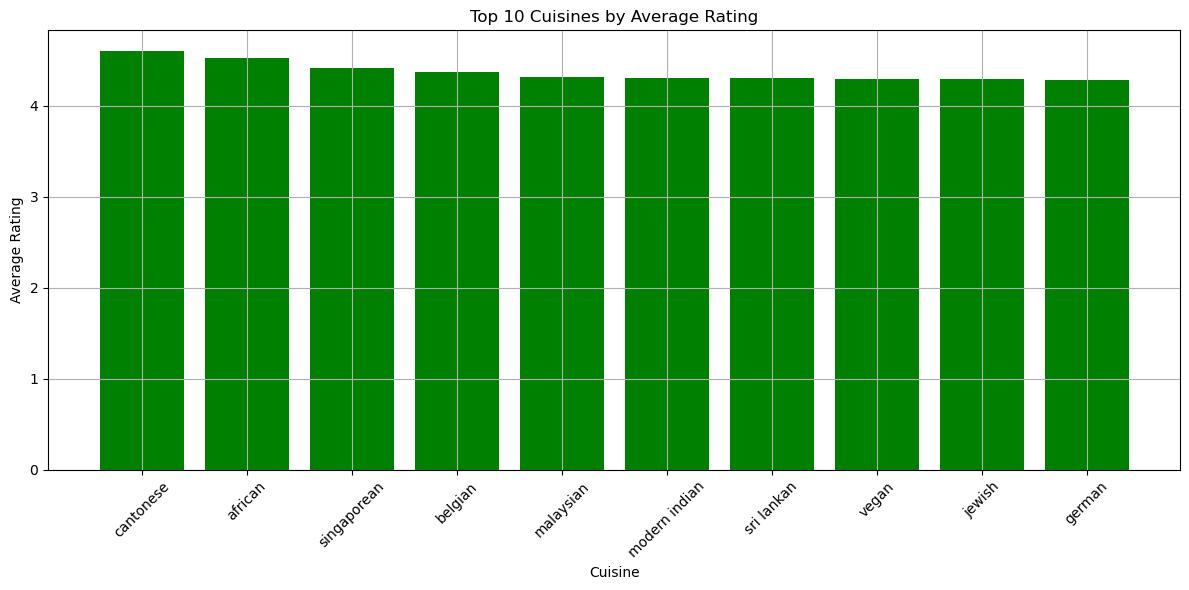

In [15]:
plt.figure(figsize=(12,6))
plt.bar(top_rated_cuisines['cuisines'], top_rated_cuisines['avg_rating'], color='green')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


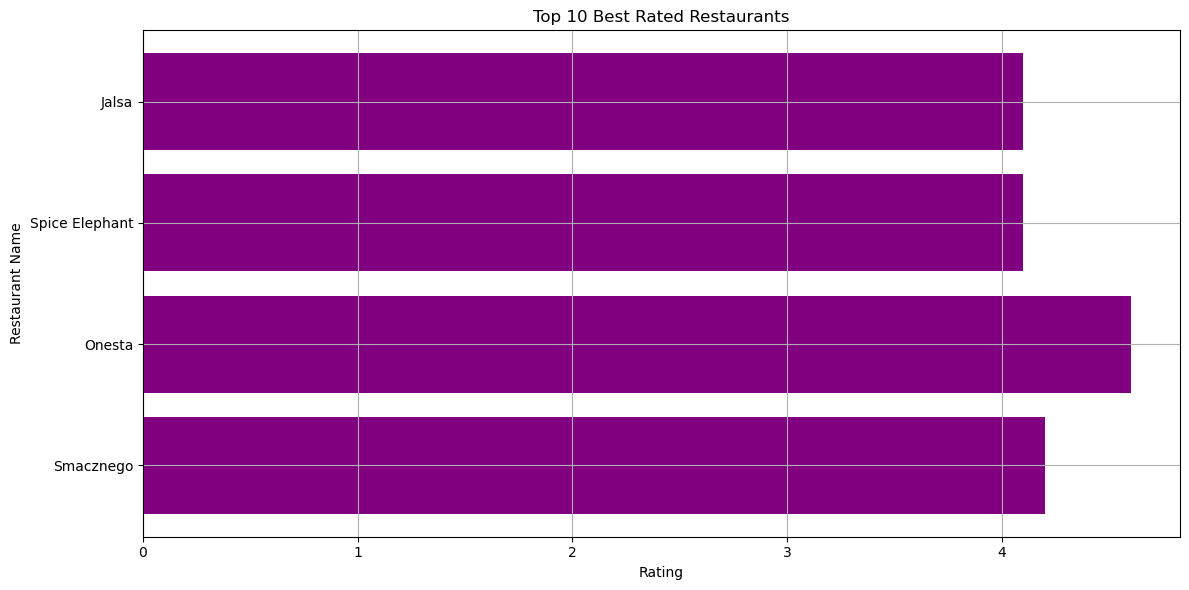

In [17]:
top_best_restaurants = best_rated_cuisines.head(10)

plt.figure(figsize=(12,6))
plt.barh(top_best_restaurants['name'], top_best_restaurants['Rating'], color='purple')
plt.title('Top 10 Best Rated Restaurants')
plt.xlabel('Rating')
plt.ylabel('Restaurant Name')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()
